### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
pd.set_option('max_rows',20000)
pd.set_option('max_columns',11)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, recall_score, precision_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix

### Load data and explore

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
df.shape

(15000, 10)

In [6]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [7]:
df['PatientID'].value_counts()

1321191    2
1127499    2
1567493    2
1314014    2
1160419    2
1242355    2
1653789    2
1950796    2
1970838    2
1866957    2
1134543    2
1033352    2
1564762    2
1146035    2
1282157    2
1467275    2
1346749    2
1830191    2
1758462    2
1819876    2
1737763    2
1612832    2
1934078    2
1713404    2
1735297    2
1264215    2
1693955    2
1636073    2
1153142    2
1273804    2
1104393    2
1663330    2
1939225    2
1772038    2
1808137    2
1709899    2
1474646    2
1399297    2
1179348    2
1733432    2
1712618    2
1409518    2
1366655    2
1806908    2
1015338    2
1168548    2
1346901    2
1214451    2
1617853    2
1972564    2
1267578    2
1701774    2
1623043    2
1459465    2
1716093    2
1700187    2
1562420    2
1792330    2
1867795    2
1600911    2
1079564    2
1455760    2
1054588    2
1063170    2
1429759    2
1382420    2
1702050    2
1314891    2
1460338    2
1912150    2
1591646    2
1244409    2
1796684    2
1149892    2
1854671    2
1633058    2
1541930    2

In [8]:
df['PatientID'].nunique()

14895

In [9]:
#plt.figure(figsize=(10,10))
#sns.countplot(x=df.PatientID)
#plt.title("PatientID")
#plt.show()

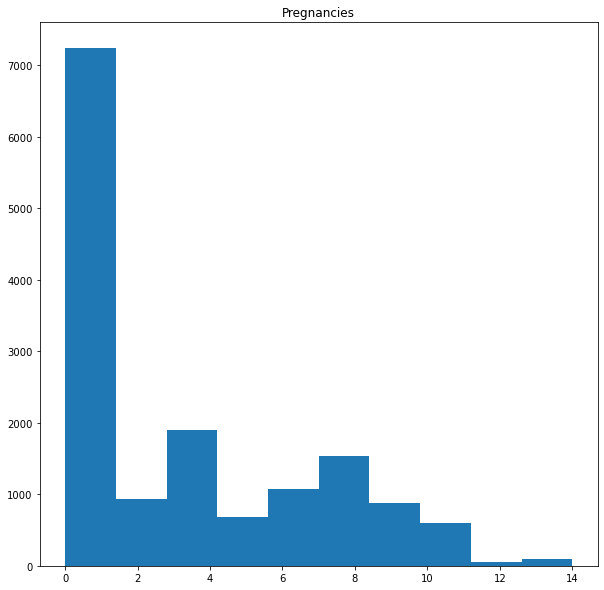

In [10]:
plt.figure(figsize=(10,10))
plt.hist(df.Pregnancies)
plt.title("Pregnancies")
plt.show()

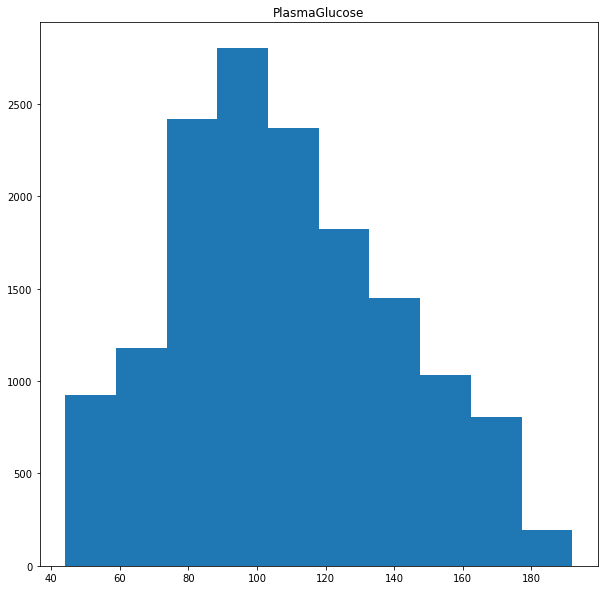

In [11]:
plt.figure(figsize=(10,10))
plt.hist(df.PlasmaGlucose)
plt.title("PlasmaGlucose")
plt.show()

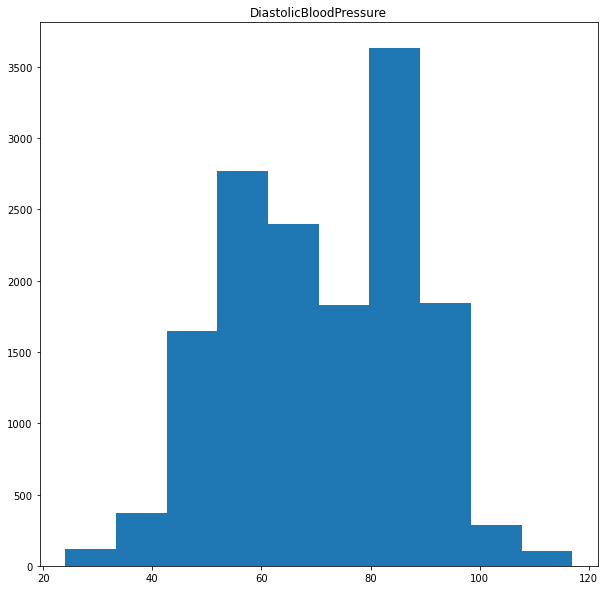

In [12]:
plt.figure(figsize=(10,10))
plt.hist(df.DiastolicBloodPressure)
plt.title("DiastolicBloodPressure")
plt.show()

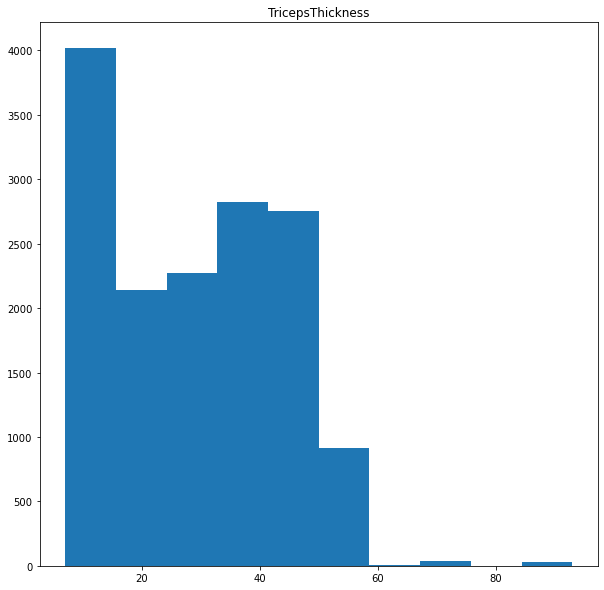

In [13]:
plt.figure(figsize=(10,10))
plt.hist(df.TricepsThickness)
plt.title("TricepsThickness")
plt.show()

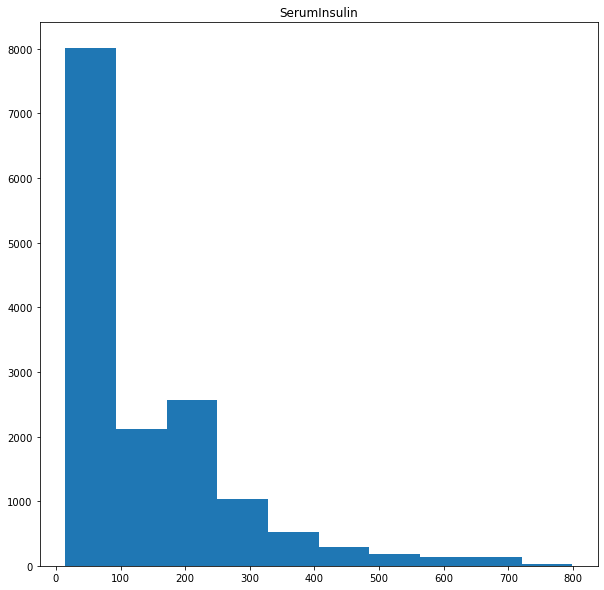

In [14]:
plt.figure(figsize=(10,10))
plt.hist(df.SerumInsulin)
plt.title("SerumInsulin")
plt.show()

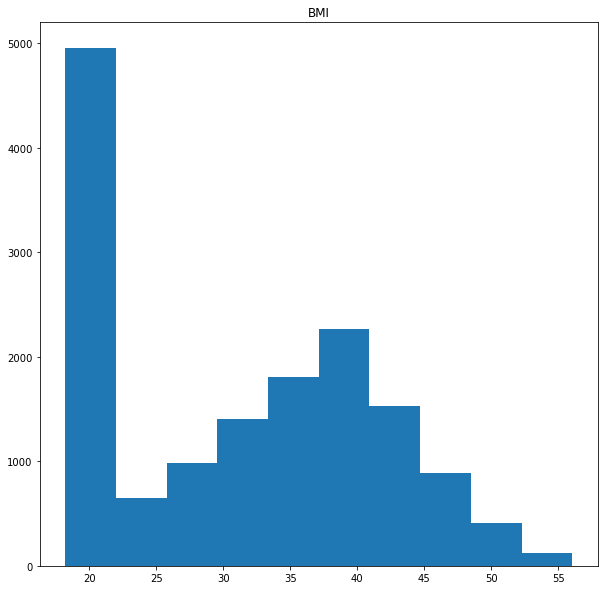

In [15]:
plt.figure(figsize=(10,10))
plt.hist(df.BMI)
plt.title("BMI")
plt.show()

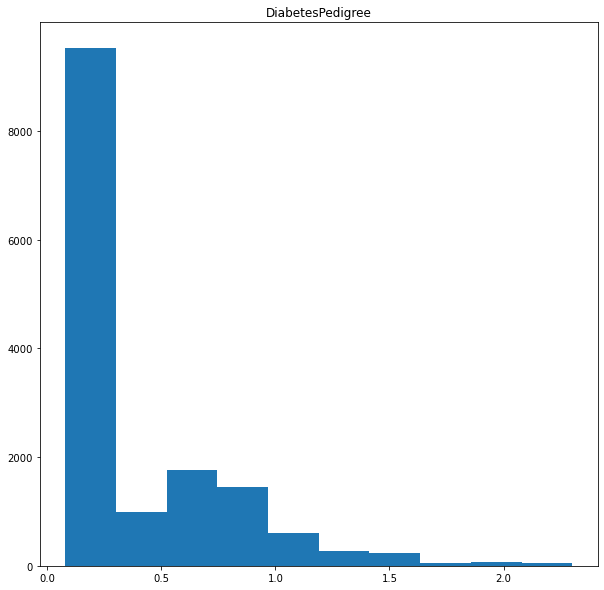

In [16]:
plt.figure(figsize=(10,10))
plt.hist(df.DiabetesPedigree)
plt.title("DiabetesPedigree")
plt.show()

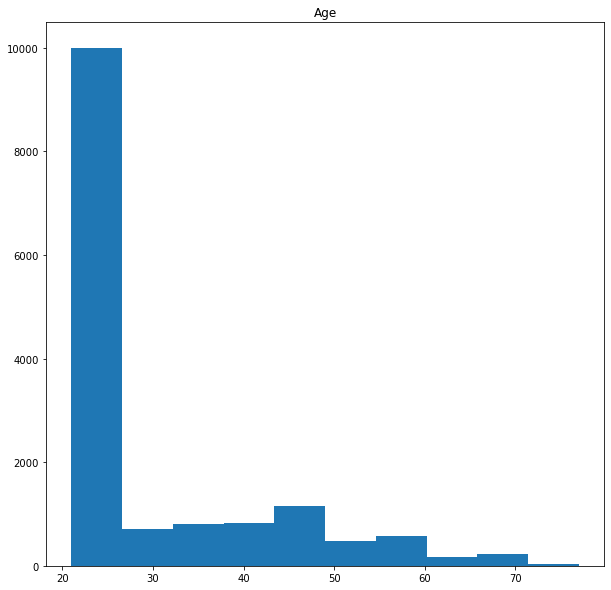

In [17]:
plt.figure(figsize=(10,10))
plt.hist(df.Age)
plt.title("Age")
plt.show()

C:\Users\mg121\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


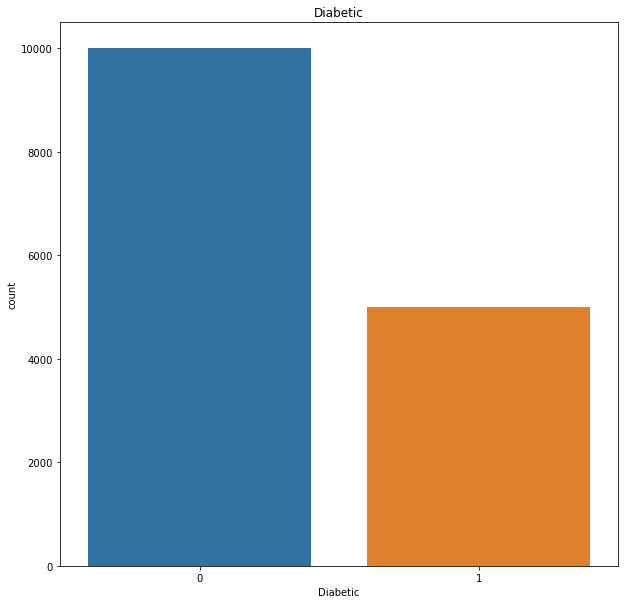

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df.Diabetic)
plt.title("Diabetic")
plt.show()

### Load doctors dataset

In [19]:
df2 = pd.read_csv("doctors.csv",encoding = "ISO-8859-1")

In [20]:
df2.head()

,PatientID,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney
3,1000183,Alaine Poisson
4,1000326,Erik Collado


In [21]:
df2.shape

(14895, 2)

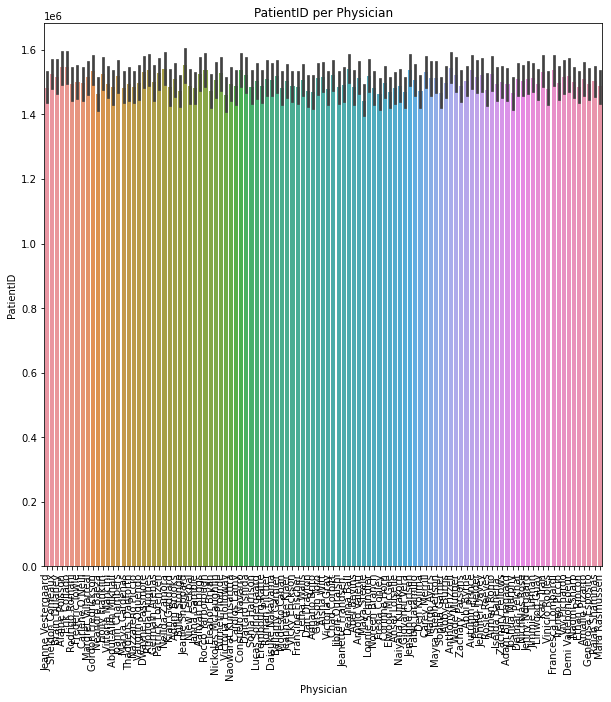

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=df2.Physician,y=df2.PatientID)
plt.title("PatientID per Physician")
plt.xticks(rotation=90)
plt.show()

In [23]:
df3 = pd.merge(left=df,right=df2,how='left',on='PatientID')

In [24]:
df3.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows


In [25]:
df3.shape

(15000, 11)

In [26]:
mask = df3['PatientID'] == 1321191

In [27]:
df3[mask] # Check to ensure physicians correct

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
3787,1321191,7,97,86,15,513,24.631944,0.529181,21,1,Kari Tran
11112,1321191,0,84,82,44,47,20.383982,0.154035,30,0,Kari Tran


In [28]:
df3.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows


In [29]:
df3.shape

(15000, 11)

In [30]:
#Save a copy of merged file
#df3.to_csv("final.csv",index=False)

### Load the final.csv file

In [31]:
df3 = pd.read_csv("final.csv")

### Create pairplots to look at relationships

In [32]:
df4 = df3.drop(['PatientID','Diabetic','Physician'],axis=1)

In [33]:
df4.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22


In [34]:
df4.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


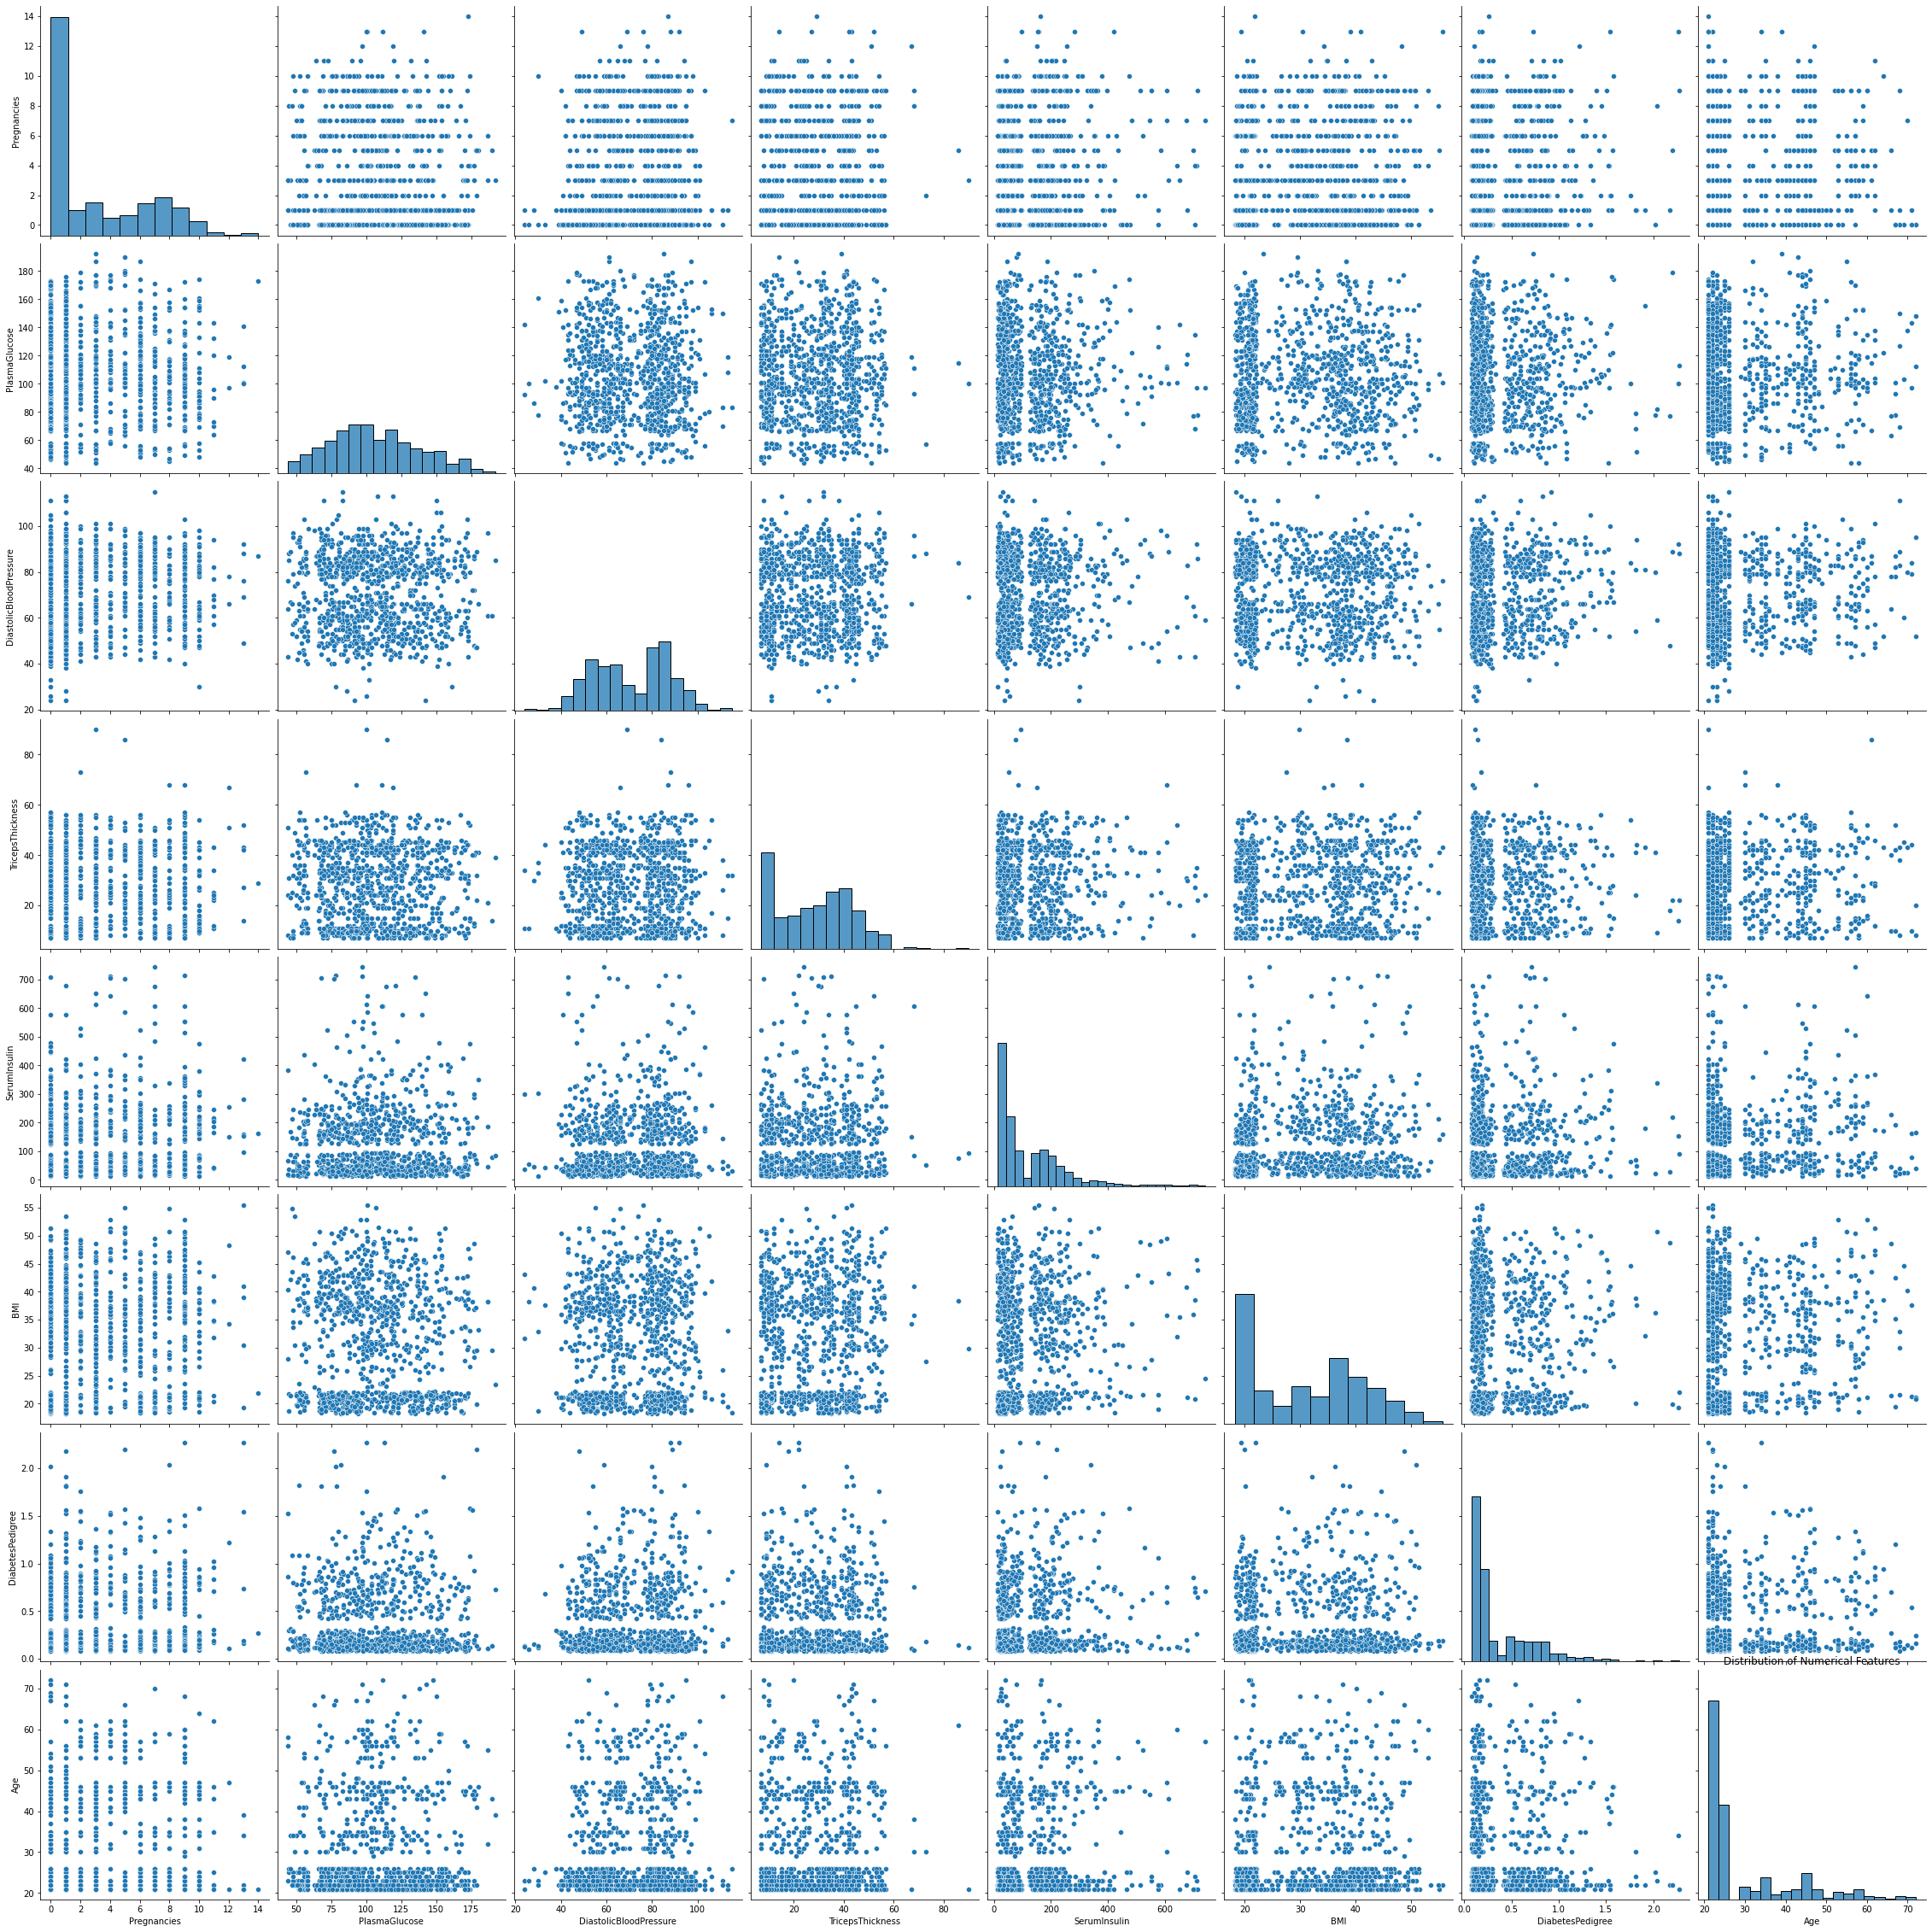

In [35]:
sns.pairplot(df4.sample(1000),height=4)
plt.title("Distribution of Numerical Features")
plt.show()

### Create boxplots

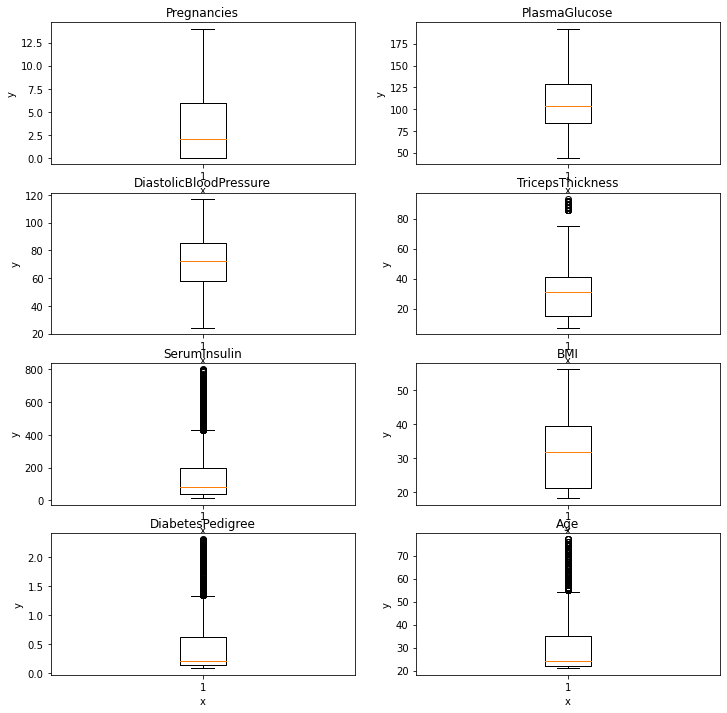

In [36]:
plt.figure(figsize=(12,12))

plt.subplot(4,2,1)
plt.boxplot(df4.Pregnancies)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pregnancies')

plt.subplot(4,2,2)
plt.boxplot(df4.PlasmaGlucose)
plt.xlabel('x')
plt.ylabel('y')
plt.title('PlasmaGlucose')

plt.subplot(4,2,3)
plt.boxplot(df4.DiastolicBloodPressure)
plt.xlabel('x')
plt.ylabel('y')
plt.title('DiastolicBloodPressure')

plt.subplot(4,2,4)
plt.boxplot(df4.TricepsThickness)
plt.xlabel('x')
plt.ylabel('y')
plt.title('TricepsThickness')

plt.subplot(4,2,5)
plt.boxplot(df4.SerumInsulin)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SerumInsulin')

plt.subplot(4,2,6)
plt.boxplot(df4.BMI)
plt.xlabel('x')
plt.ylabel('y')
plt.title('BMI')

plt.subplot(4,2,7)
plt.boxplot(df4.DiabetesPedigree)
plt.xlabel('x')
plt.ylabel('y')
plt.title('DiabetesPedigree')

plt.subplot(4,2,8)
plt.boxplot(df4.Age)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Age')


plt.show()

### Preprocessing Data

In [37]:
df3.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows


In [38]:
df3['AgeLog'] = np.log(df3['Age'])

In [39]:
df3.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,...,DiabetesPedigree,Age,Diabetic,Physician,AgeLog
0,1354778,0,171,80,34,...,1.213191,21,0,Dan Drayton,3.044522
1,1147438,8,92,93,47,...,0.158365,23,0,Anthony Frizzell,3.135494
2,1640031,7,115,47,52,...,0.079019,23,0,Gordon Fredrickson,3.135494
3,1883350,9,103,78,25,...,1.282870,43,1,Chad Corbitt,3.761200
4,1424119,1,85,59,27,...,0.549542,22,0,Zachary Fellows,3.091042


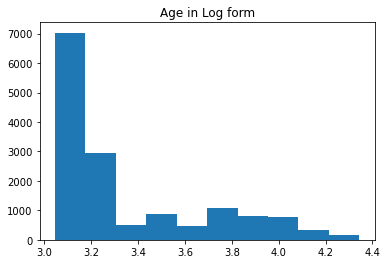

In [40]:
plt.hist(df3['AgeLog'])
plt.title("Age in Log form")
plt.show()

In [41]:
df3 = df3.drop(['Age'],axis=1)

In [42]:
df3.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Diabetic,Physician,AgeLog
0,1354778,0,171,80,34,23,43.509726,1.213191,0,Dan Drayton,3.044522
1,1147438,8,92,93,47,36,21.240576,0.158365,0,Anthony Frizzell,3.135494
2,1640031,7,115,47,52,35,41.511523,0.079019,0,Gordon Fredrickson,3.135494
3,1883350,9,103,78,25,304,29.582192,1.282870,1,Chad Corbitt,3.761200
4,1424119,1,85,59,27,35,42.604536,0.549542,0,Zachary Fellows,3.091042


In [43]:
df3.shape

(15000, 11)

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Diabetic                15000 non-null  int64  
 9   Physician               15000 non-null  object 
 10  AgeLog                  15000 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.3+ MB


In [45]:
df5 = df3[['PatientID','Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness',
          'SerumInsulin','BMI','DiabetesPedigree','AgeLog','Physician','Diabetic']]

In [46]:
df5.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,AgeLog,Physician,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,3.044522,Dan Drayton,0
1,1147438,8,92,93,47,36,21.240576,0.158365,3.135494,Anthony Frizzell,0
2,1640031,7,115,47,52,35,41.511523,0.079019,3.135494,Gordon Fredrickson,0
3,1883350,9,103,78,25,304,29.582192,1.282870,3.761200,Chad Corbitt,1
4,1424119,1,85,59,27,35,42.604536,0.549542,3.091042,Zachary Fellows,0


In [47]:
df5.tail()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,AgeLog,Physician,Diabetic
14995,1490300,10,65,60,46,177,33.512468,0.148327,3.713572,Letha Walls,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,3.637586,Janna Gamble,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,3.178054,Aisha Witt,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,3.135494,Carey Merrill,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,3.526361,Mara Rasmussen,1


In [48]:
df5.shape

(15000, 11)

In [49]:
#Save a new csv for arranged dataset
#df5.to_csv("arranged.csv",index=False)

### Data Scaling

In [50]:
df5 = pd.read_csv("arranged.csv")

In [51]:
df5.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,AgeLog,Physician,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,3.044522,Dan Drayton,0
1,1147438,8,92,93,47,36,21.240576,0.158365,3.135494,Anthony Frizzell,0
2,1640031,7,115,47,52,35,41.511523,0.079019,3.135494,Gordon Fredrickson,0
3,1883350,9,103,78,25,304,29.582192,1.282870,3.761200,Chad Corbitt,1
4,1424119,1,85,59,27,35,42.604536,0.549542,3.091042,Zachary Fellows,0


In [52]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   AgeLog                  15000 non-null  float64
 9   Physician               15000 non-null  object 
 10  Diabetic                15000 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.3+ MB


In [53]:
df5['PatientID'] = df5['PatientID'].astype('category')

In [54]:
df5['PatientID'].dtype

CategoricalDtype(categories=[1000038, 1000069, 1000118, 1000183, 1000326, 1000340,
                  1000471, 1000482, 1000510, 1000652,
                  ...
                  1999250, 1999319, 1999410, 1999551, 1999656, 1999765,
                  1999836, 1999864, 1999940, 1999997],
                 ordered=False)

In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PatientID               15000 non-null  category
 1   Pregnancies             15000 non-null  int64   
 2   PlasmaGlucose           15000 non-null  int64   
 3   DiastolicBloodPressure  15000 non-null  int64   
 4   TricepsThickness        15000 non-null  int64   
 5   SerumInsulin            15000 non-null  int64   
 6   BMI                     15000 non-null  float64 
 7   DiabetesPedigree        15000 non-null  float64 
 8   AgeLog                  15000 non-null  float64 
 9   Physician               15000 non-null  object  
 10  Diabetic                15000 non-null  int64   
dtypes: category(1), float64(3), int64(6), object(1)
memory usage: 1.9+ MB


In [56]:
df5.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,AgeLog,Physician,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,3.044522,Dan Drayton,0
1,1147438,8,92,93,47,36,21.240576,0.158365,3.135494,Anthony Frizzell,0
2,1640031,7,115,47,52,35,41.511523,0.079019,3.135494,Gordon Fredrickson,0
3,1883350,9,103,78,25,304,29.582192,1.282870,3.761200,Chad Corbitt,1
4,1424119,1,85,59,27,35,42.604536,0.549542,3.091042,Zachary Fellows,0


In [57]:
X = df5.iloc[:,0:10]
y = df5.iloc[:,10]

In [58]:
X.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,AgeLog,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,3.044522,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,3.135494,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,3.135494,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,3.761200,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,3.091042,Zachary Fellows


In [59]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Diabetic, dtype: int64

In [60]:
X_scalar = X[['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']]

In [61]:
X_scalar.shape

(15000, 5)

In [62]:
X_scalar.values

array([[171.        ,  80.        ,  34.        ,  23.        ,
         43.50972593],
       [ 92.        ,  93.        ,  47.        ,  36.        ,
         21.24057571],
       [115.        ,  47.        ,  52.        ,  35.        ,
         41.51152348],
       ...,
       [ 93.        ,  89.        ,  43.        ,  57.        ,
         18.69068305],
       [132.        ,  98.        ,  18.        , 161.        ,
         19.7916451 ],
       [114.        ,  65.        ,  47.        , 512.        ,
         36.21543653]])

In [63]:
X_minmax = X[['Pregnancies','DiabetesPedigree','AgeLog']]

In [64]:
X_minmax.shape

(15000, 3)

In [65]:
X_minmax.values

array([[0.        , 1.21319135, 3.04452244],
       [8.        , 0.15836498, 3.13549422],
       [7.        , 0.07901857, 3.13549422],
       ...,
       [0.        , 0.42704896, 3.17805383],
       [0.        , 0.30225721, 3.13549422],
       [3.        , 0.14736285, 3.52636052]])

### Normalize Data using Column Transformer

Each transformer is a three-element tuple that defines the name of the transformer, 
the transform to apply, and the column indices to apply it to. For example:
(Name, Object, Columns)


In [66]:
# define the data preparation for the columns

t1 = [('scale',StandardScaler(),X_scalar)]
t2 = [('ohe',MinMaxScaler(),X_minmax)]

In [67]:
col_transform = ColumnTransformer(transformers=t1, remainder='passthrough')

In [68]:
col_transform.fit_transform(X)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

### Use make_column_transformer

In [ ]:
make_column_transformer((StandardScaler(),[X_scalar]),remainder="passthrough")

In [ ]:
ct1 = ColumnTransformer(transformers=('standardscaler', StandardScaler(),['X_scalar']),remainder="passthrough")

In [ ]:
X_new = ct1.fit(X)

### Use StandardScaler method

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scale_new = scaler.fit_transform(X_scalar)

In [ ]:
X_scale_new

In [ ]:
X_scale_new = pd.DataFrame(X_scale_new, columns=X_scalar.columns)

In [ ]:
X_scale_new.head()

### Use MinMax method

In [ ]:
minmax = MinMaxScaler()

In [ ]:
X_mm_new = minmax.fit_transform(X_minmax)

In [ ]:
X_mm_new

In [ ]:
X_mm_new = pd.DataFrame(X_mm_new, columns=X_minmax.columns)

In [ ]:
X_mm_new.head()

### Merge the transformed dataset to existing one

In [ ]:
df5.head()

In [ ]:
df6 = df5.drop(['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness',
               'SerumInsulin','BMI','DiabetesPedigree','AgeLog'],axis=1)

In [ ]:
df6.head()

In [ ]:
df6.shape

In [ ]:
df7 = pd.concat([df6,X_scale_new,X_mm_new],axis=1)

In [ ]:
df7.head()

In [ ]:
df7.shape

In [ ]:
df7.describe() #Check if all transformed correctly

The PatientID and Physician columns are unlikely to contribute any predictive information for diagnosing diabetes

In [ ]:
df8 = df7.drop(['PatientID','Physician'],axis=1)

In [ ]:
df8.head()

In [ ]:
df8.shape

In [ ]:
df8.info()

In [ ]:
#Rearrange columns
df8 = df8[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness',
          'SerumInsulin','BMI','DiabetesPedigree','AgeLog','Diabetic']]

In [ ]:
df8.head()

In [ ]:
df8.tail()

In [ ]:
df8.shape

In [ ]:
#Save to a new csv file
#df8.to_csv("cleaned.csv",index=False)

### Train and Evaluate the Classification Model

In [ ]:
df8 = pd.read_csv("cleaned.csv")

In [ ]:
df8.shape

In [ ]:
df8.info()

In [ ]:
df8.head()

In [ ]:
X = df8.iloc[:,0:8]
y = df8.iloc[:,8]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234,stratify=None)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
model = LogisticRegression(penalty='l2',tol=1e-7,random_state=1234,solver='liblinear')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

### Logistic Regression Model Evaluation

In [ ]:
roc_auc_score(y_test,y_pred)  #ROC Score

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
plot_roc_curve(model, X_test, y_test) 
plt.title("ROC Curve")
plt.show()

In [ ]:
accuracy_score(y_test,y_pred) #Accuracy score

In [ ]:
recall_score(y_test,y_pred) #Recall score

In [ ]:
precision_score(y_test,y_pred) #Precision score

In [ ]:
f1_score(y_test,y_pred) #F1-score

### Gradient Tree Boosting

In [ ]:
model2 = GradientBoostingClassifier(max_leaf_nodes=20,min_samples_leaf=10,learning_rate=0.2,
                                   n_estimators=100, random_state=1234)

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
y_pred

### Gradient Boosting Model Evaluation

In [ ]:
roc_auc_score(y_test,y_pred)  #ROC Score

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
plot_roc_curve(model2, X_test, y_test) 
plt.title("ROC Curve")
plt.show()

In [ ]:
accuracy_score(y_test,y_pred) #Accuracy score

In [ ]:
recall_score(y_test,y_pred) #Recall score

In [ ]:
precision_score(y_test,y_pred) #Precision score

In [ ]:
f1_score(y_test,y_pred) #F1-score

In [ ]:
print(classification_report(y_test,y_pred))

**Conclusion: Gradient Boosting Classifier gives better result**

### Import cleaned test data for prediction

In [ ]:
test = pd.read_csv("testcleaned.csv")

In [ ]:
test

In [ ]:
y_pred2 = model2.predict(test)

In [ ]:
y_pred2

In [ ]:
model2.predict_proba(test) #Predict class probabilities for test set

### Prediction is all 0, means no diabetes for these three patients